In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
from scipy import stats
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [7]:
res_outlier=df[(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))]
res_outlier.isna().sum()

Pregnancies                 764
Glucose                     763
BloodPressure               723
SkinThickness               767
Insulin                     734
BMI                         749
DiabetesPedigreeFunction    739
Age                         759
Outcome                     768
dtype: int64

In [8]:
df1 = df[~((df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(639, 9)

In [9]:
df1[df1.duplicated()].sum()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [10]:
df1.nunique()

Pregnancies                  14
Glucose                     132
BloodPressure                39
SkinThickness                48
Insulin                     148
BMI                         227
DiabetesPedigreeFunction    442
Age                          46
Outcome                       2
dtype: int64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    int64  
 1   Glucose                   639 non-null    int64  
 2   BloodPressure             639 non-null    int64  
 3   SkinThickness             639 non-null    int64  
 4   Insulin                   639 non-null    int64  
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    int64  
 8   Outcome                   639 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.9 KB


In [12]:
# Split the x /input and y /output col
x=df1.iloc[:,0:8].values
y=df1.iloc[:,8].values

In [13]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [14]:
y

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [15]:
# Now we hv to didvide the data into train and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [16]:
x_train

array([[1.20e+01, 1.21e+02, 7.80e+01, ..., 2.65e+01, 2.59e-01, 6.20e+01],
       [4.00e+00, 1.14e+02, 6.40e+01, ..., 2.89e+01, 1.26e-01, 2.40e+01],
       [1.00e+01, 1.61e+02, 6.80e+01, ..., 2.55e+01, 3.26e-01, 4.70e+01],
       ...,
       [3.00e+00, 7.40e+01, 6.80e+01, ..., 2.97e+01, 2.93e-01, 2.30e+01],
       [1.00e+00, 1.06e+02, 7.60e+01, ..., 3.75e+01, 1.97e-01, 2.60e+01],
       [3.00e+00, 1.21e+02, 5.20e+01, ..., 3.60e+01, 1.27e-01, 2.50e+01]])

In [17]:
# scaling the data set
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [18]:
# Bring in 6 models and run the data to find which model is best fit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [19]:
# it uses stratified logic to test the data.
from sklearn.model_selection import StratifiedKFold

# cross val score will give the score of ytest and ypredicted
from sklearn.model_selection import cross_val_score

In [20]:
# Add all the models to same data set are in a list.
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))


In [21]:
#Running the models
results=[]
names=[]
res=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=None)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    names.append(name)
    res.append(cv_results.mean())
    print(name,cv_results.mean())

LR 0.7763741134751772
LDA 0.7785017730496453
KNN 0.743218085106383
DT 0.7014627659574467
NB 0.763918439716312
SVM 0.7785904255319148


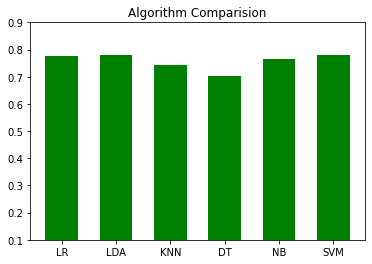

In [22]:
import matplotlib.pyplot as pyplot
pyplot.ylim(.100,.900)
pyplot.bar(names,res,color='Green',width=0.6)
pyplot.title('Algorithm Comparision')
pyplot.show()

In [23]:
# from  above comparision we can say that SVM has got better accuarcy
model=SVC(random_state=0)
model.fit(x_train,y_train)

SVC(random_state=0)

In [24]:
y_pred=model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[93 12]
 [27 28]]
Accuracy of the Model: 75.625%


# PCA


In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


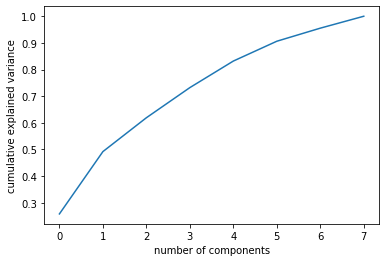

In [27]:
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');